In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
# Load the dataset
data = pd.read_csv("C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/optimized_dataset.csv")
data.head()


,Weekly_Sales_Log_Standardized,CPI_Log_Standardized,Store_Standardized,Dept_Standardized,Temperature_Standardized,Fuel_Price_Standardized,MarkDown1_Standardized,MarkDown4_Standardized
0,0.877474,1.020494,-1.950537,-1.913804,-1.000331,-1.653971,-0.740193,-0.679922
1,1.362127,1.023284,-1.950537,-1.913804,-1.192331,-1.653971,-0.740193,-0.679922
2,1.278926,1.024182,-1.950537,-1.913804,-1.121142,-1.653971,-0.740193,-0.679922
3,0.692145,1.024765,-1.950537,-1.913804,-0.776476,-1.653971,-0.740193,-0.679922
4,0.778401,1.025348,-1.950537,-1.913804,-0.783295,-1.576265,-0.740193,-0.679922


In [4]:
# Assuming 'Weekly_Sales' as the target variable
X = data.drop('Weekly_Sales_Log_Standardized', axis=1)  # Özellikler
y = data['Weekly_Sales_Log_Standardized']  # Hedef değişken


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Modeli derleyin
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - loss: 0.9030 - val_loss: 0.7187
Epoch 2/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.7109 - val_loss: 0.6489
Epoch 3/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 0.6595 - val_loss: 0.5902
Epoch 4/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.6120 - val_loss: 0.5258
Epoch 5/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 0.5573 - val_loss: 0.4599
Epoch 6/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - loss: 0.5076 - val_loss: 0.4311
Epoch 7/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.4752 - val_loss: 0.4473
Epoch 8/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.4510 - val_loss: 0.3882
Epoch 9/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 0.4307 - val_loss: 0.3901
Epoch 10/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 0.4178 - val_loss: 0.3667
Epoch 11/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.4040 - val_loss: 0.34

In [7]:
# Test verisiyle tahmin yapın
y_pred = model.predict(X_test)

# Performans metrikleri
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Mean Absolute Error: 0.3542971044912767
Mean Squared Error: 0.2475029693468409
R-squared: 0.7519595955796984


# Model Development for Weekly Sales Forecasting

## Step 1: Import Libraries
In this step, we import all necessary libraries for data manipulation, model building, and evaluation.

## Step 2: Load and Inspect the Dataset
We load the optimized dataset that has been preprocessed in previous steps.

## Step 3: Feature and Target Separation
Separate the target variable (Weekly Sales) from the input features.

## Step 4: Train-Test Split
Split the data into training and testing sets to evaluate model performance later.

## Step 5: Model Building and Training
Build an LSTM model for time series forecasting and train it with the training data.

## Step 6: Model Evaluation
Evaluate the model’s performance on the test set using metrics like MAE, MSE, and R-squared.


In [8]:
original_data = pd.read_csv("C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/test.csv", parse_dates=["Date"])
data = data.merge(original_data[['Date']], left_index=True, right_index=True)


In [9]:
data['Date'] = pd.to_datetime(data['Date'])



In [10]:
data['Month'] = data['Date'].dt.month
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek



Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


En İyi LSTM Parametreleri:  {'model__units': 32, 'model__optimizer': 'adam', 'model__dropout_rate': 0.1, 'batch_size': 32}
LSTM Model Performansı
Ortalama Mutlak Hata (MAE): 0.5806976652599218
Ortalama Kare Hata (MSE): 0.5546837580437869
R-Karesi: 0.44411178567417964

Random Forest Model Performansı
Ortalama Mutlak Hata (MAE): 0.33766287753190016
Ortalama Kare Hata (MSE): 0.21778249065871627
R-Karesi: 0.7817446101709242


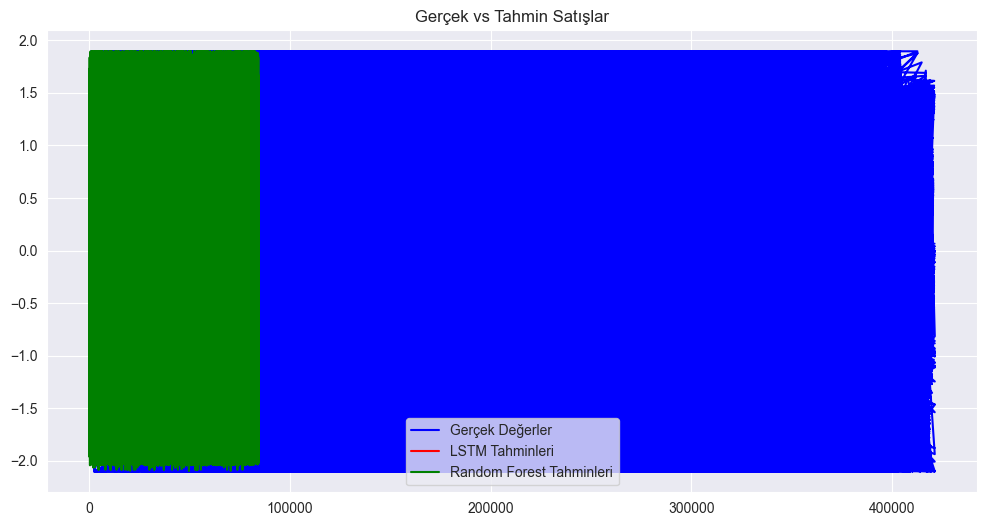

In [11]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# LSTM modeli oluşturma fonksiyonu, parametrelerle daha geniş bir model yapılandırması sağlanıyor
def create_model(units=32, dropout_rate=0.1, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# KerasRegressor ile LSTM modelini sarmalıyoruz ve EarlyStopping ile eğitim sürecini durdurma koşulu ekliyoruz
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0,
                       callbacks=[EarlyStopping(monitor='loss', patience=2)])

# Hiperparametre aralığını daha daraltılmış şekilde tanımlıyoruz
param_grid = {
    'model__units': [16, 32],
    'model__dropout_rate': [0.1],
    'model__optimizer': ['adam'],
    'batch_size': [32]
}

# Hızlı arama için RandomizedSearchCV kullanarak LSTM modelinde en iyi parametreleri buluyoruz
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_iter=2, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# En iyi parametreleri yazdır
print("En İyi LSTM Parametreleri: ", grid_result.best_params_)

# En iyi LSTM modelini kullanarak tahmin yapıyoruz
y_pred_lstm = grid_result.best_estimator_.predict(X_test)

# LSTM Model Performans Metriği
print("LSTM Model Performansı")
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(y_test, y_pred_lstm))
print("Ortalama Kare Hata (MSE):", mean_squared_error(y_test, y_pred_lstm))
print("R-Karesi:", r2_score(y_test, y_pred_lstm))

# RandomForest modelini oluştur ve eğit
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# RandomForest modeli ile tahmin yap
y_pred_rf = rf_model.predict(X_test)

# RandomForest Model Performans Metriği
print("\nRandom Forest Model Performansı")
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Ortalama Kare Hata (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-Karesi:", r2_score(y_test, y_pred_rf))

# Model tahminlerini görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Gerçek Değerler')
plt.plot(y_pred_lstm, color='red', label='LSTM Tahminleri')
plt.plot(y_pred_rf, color='green', label='Random Forest Tahminleri')
plt.title("Gerçek vs Tahmin Satışlar")
plt.legend()
plt.show()



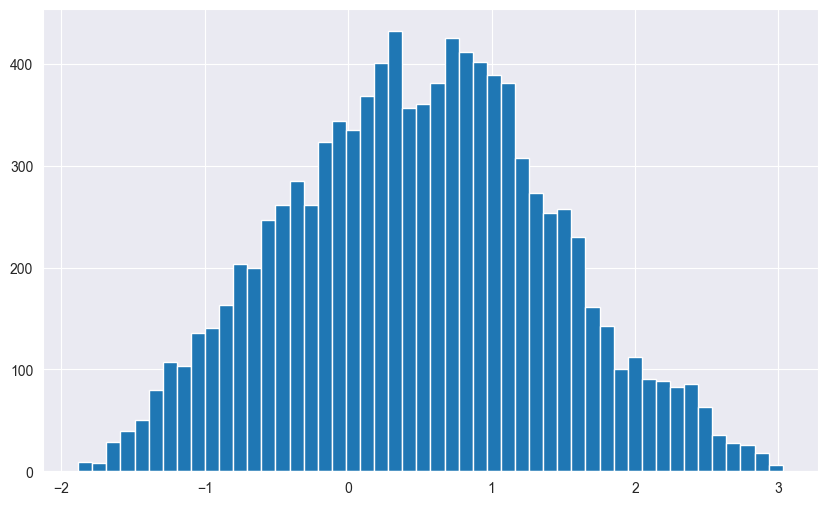

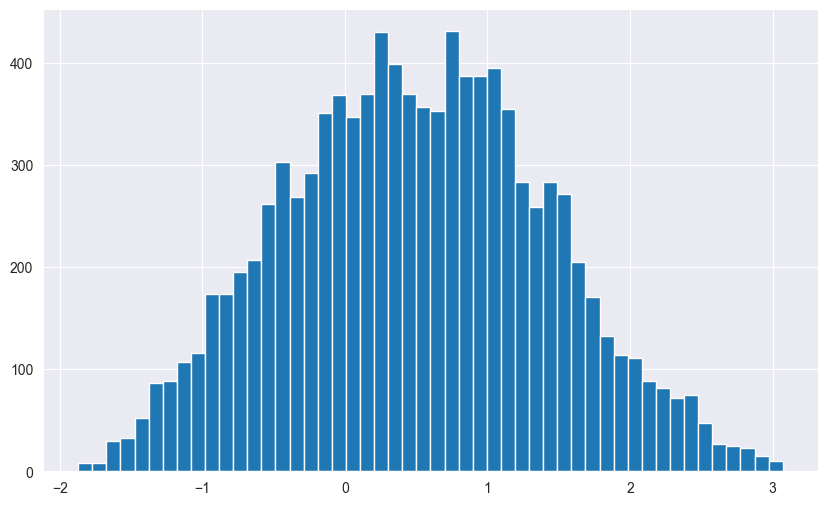

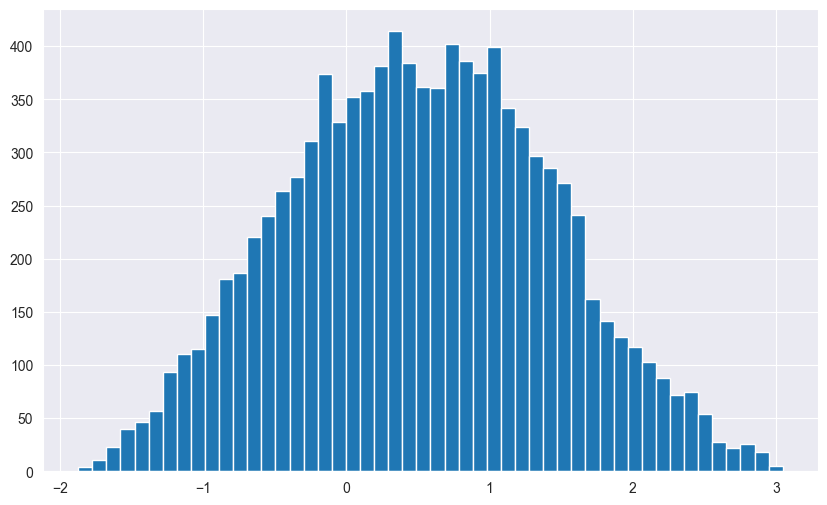

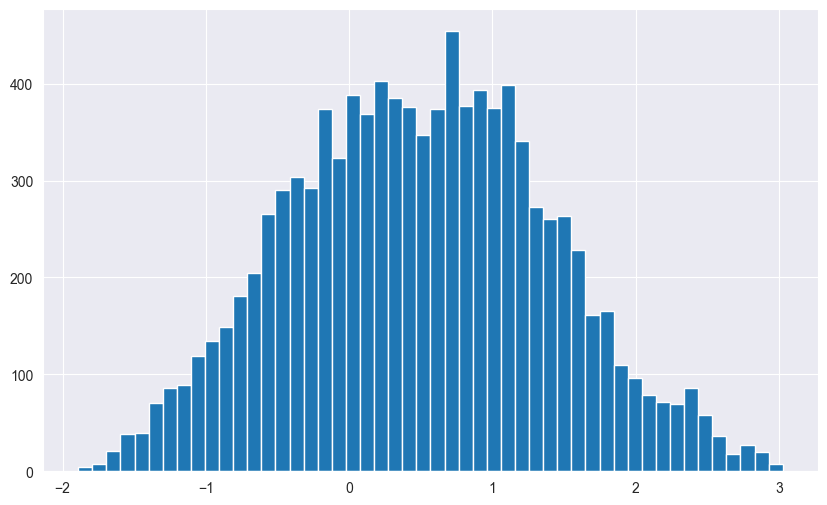

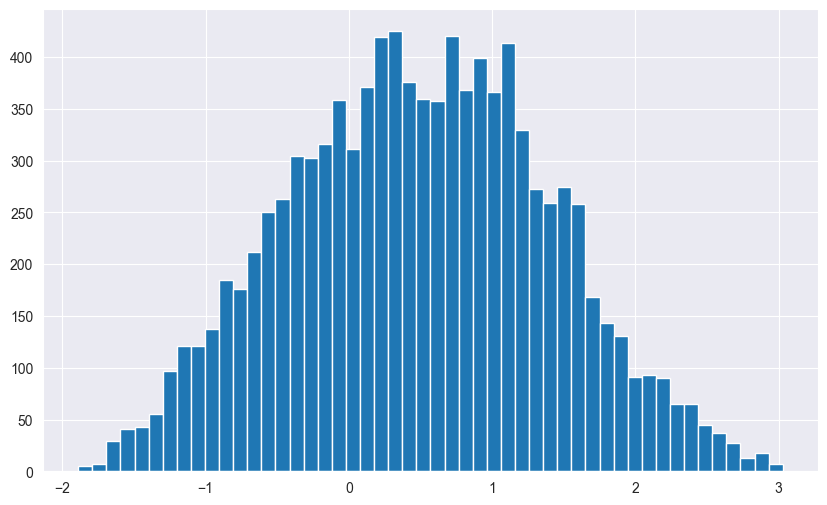

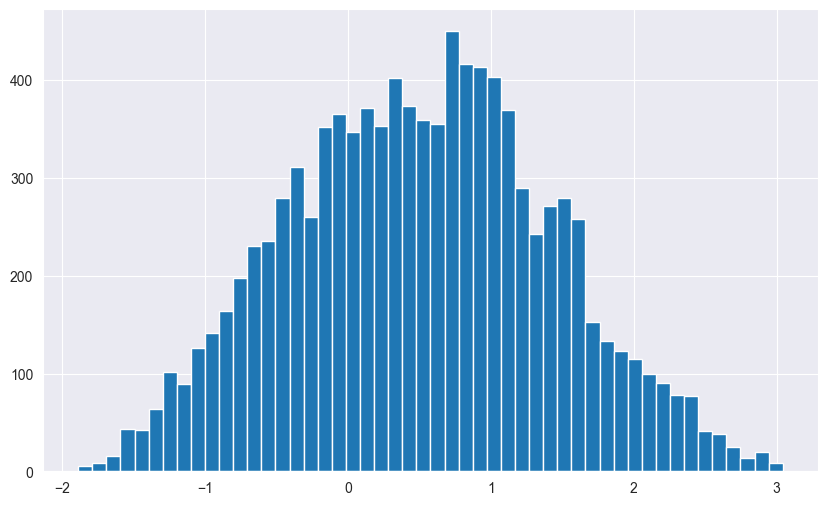

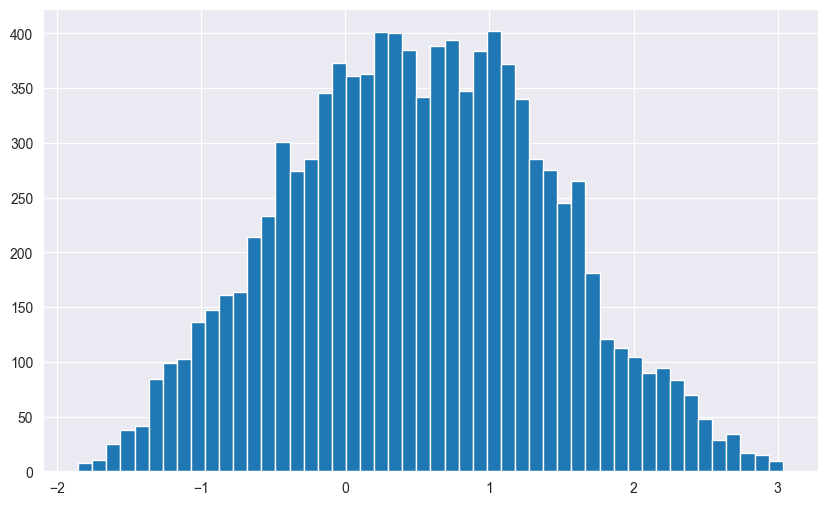

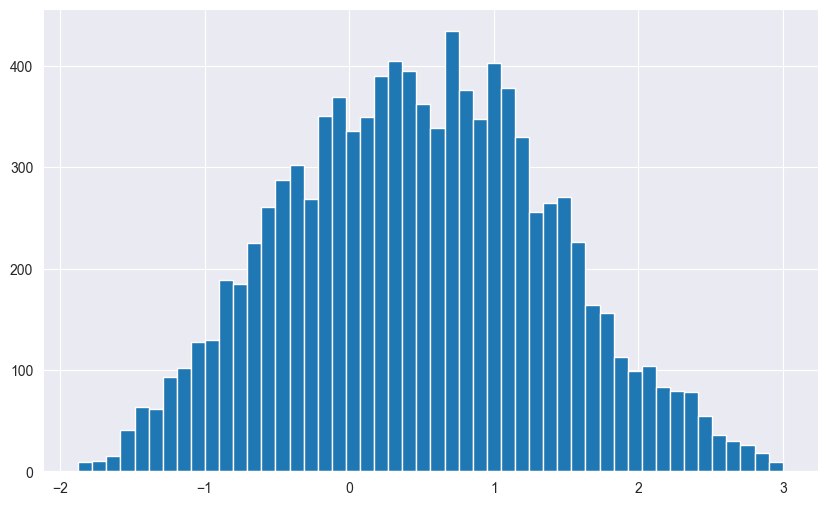

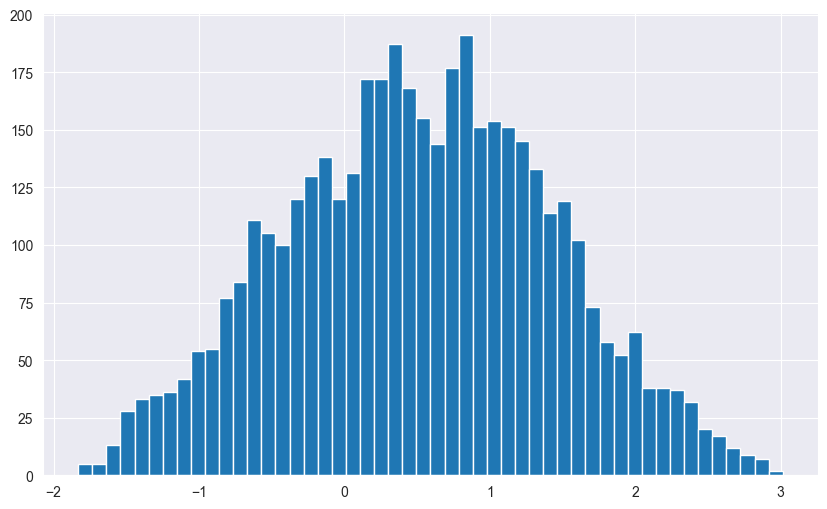

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are large numpy arrays
  # Replace with actual y_pred

# Calculate residuals in a memory-efficient way
residuals = y_test - y_pred_rf  # Ensure y_test and y_pred are 1D arrays, not 2D

# Plotting in smaller batches to avoid large memory allocations
batch_size = 10000  # Adjust batch size as necessary
for i in range(0, len(residuals), batch_size):
    plt.figure(figsize=(10, 6))
    plt.hist(residuals[i:i + batch_size], bins=50)
    plt.show()


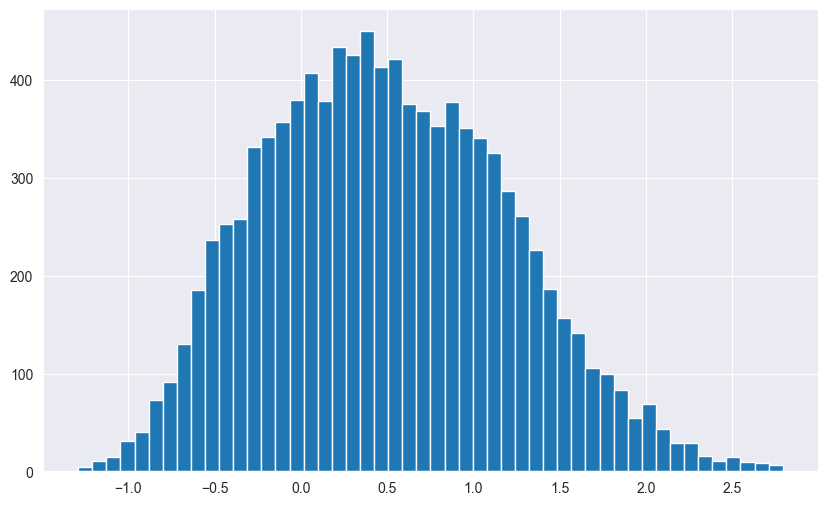

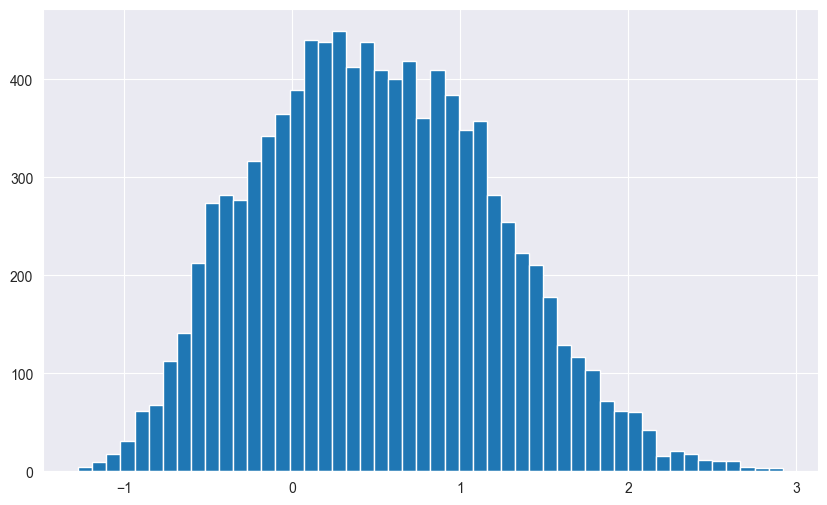

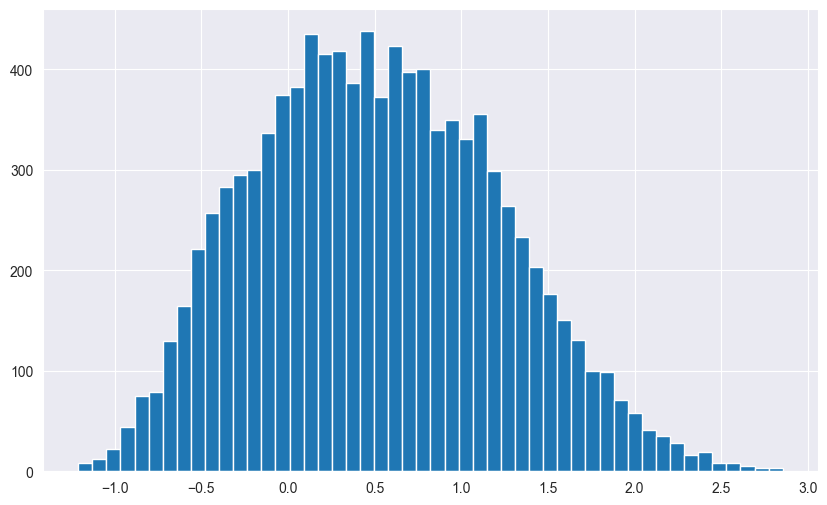

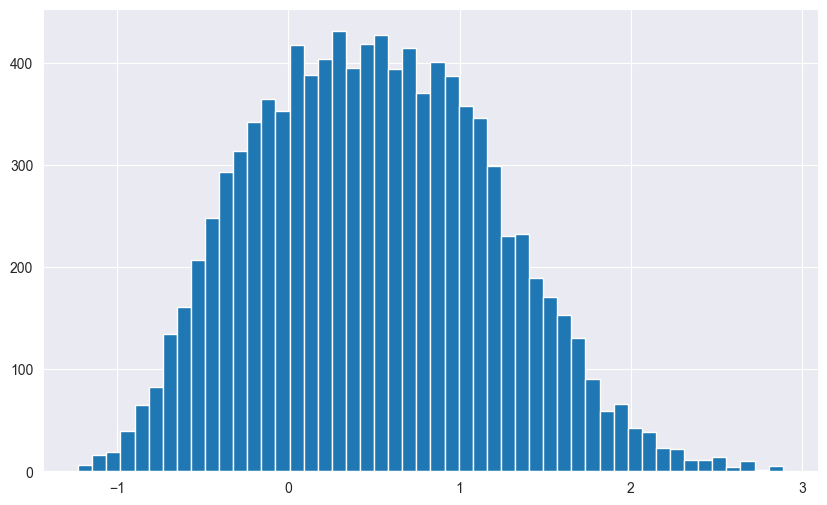

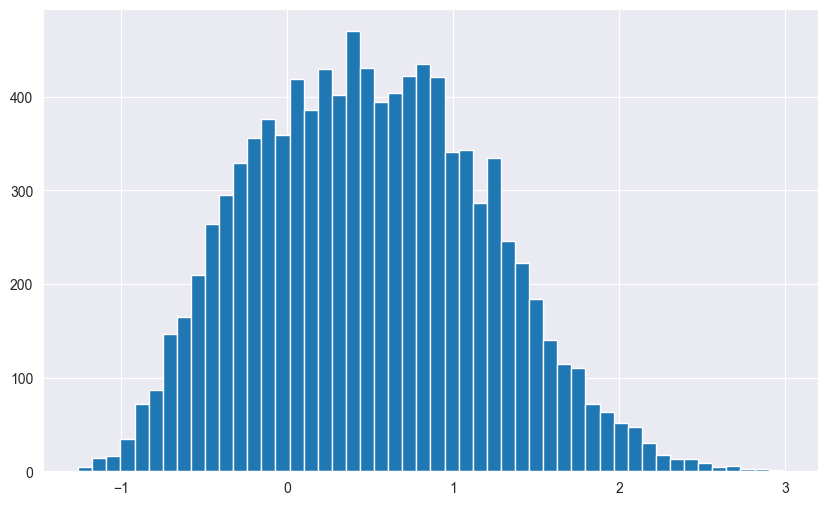

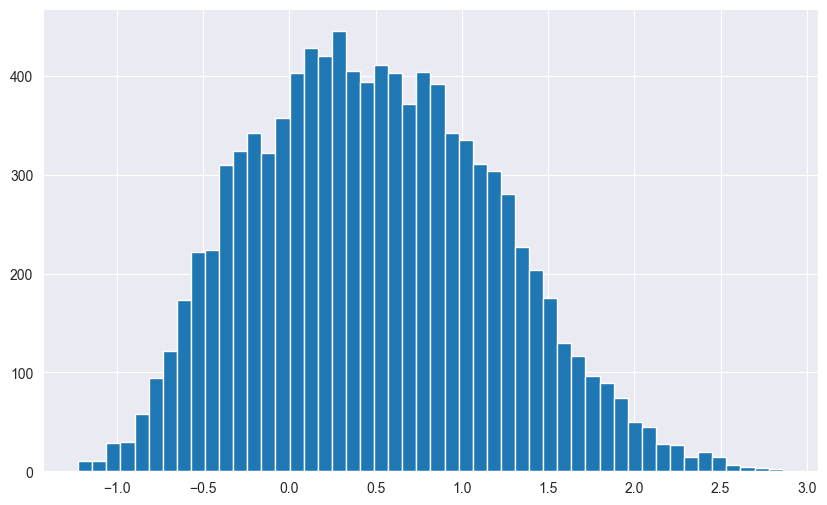

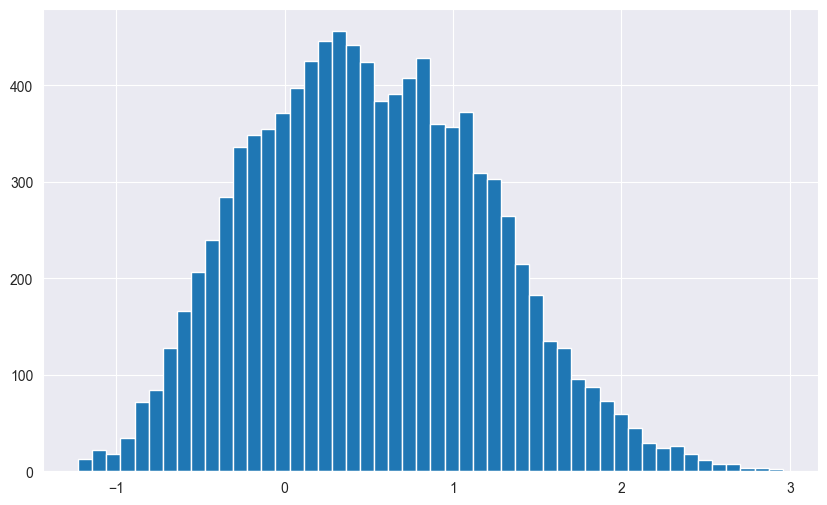

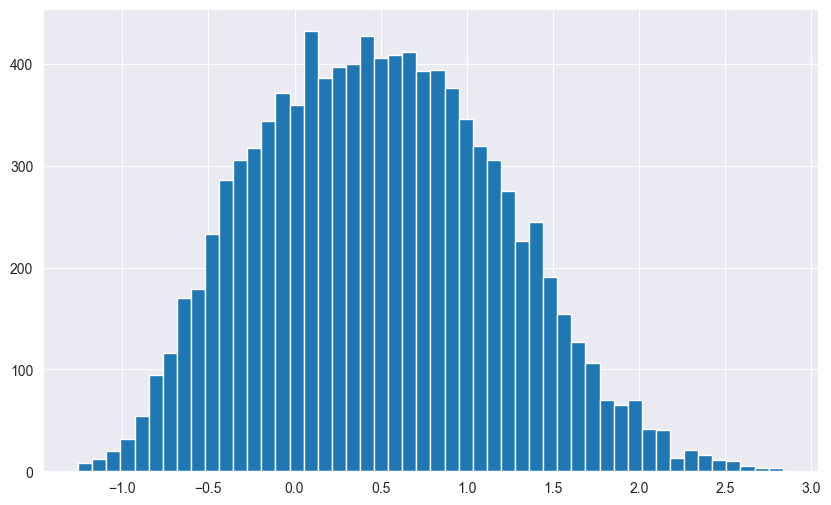

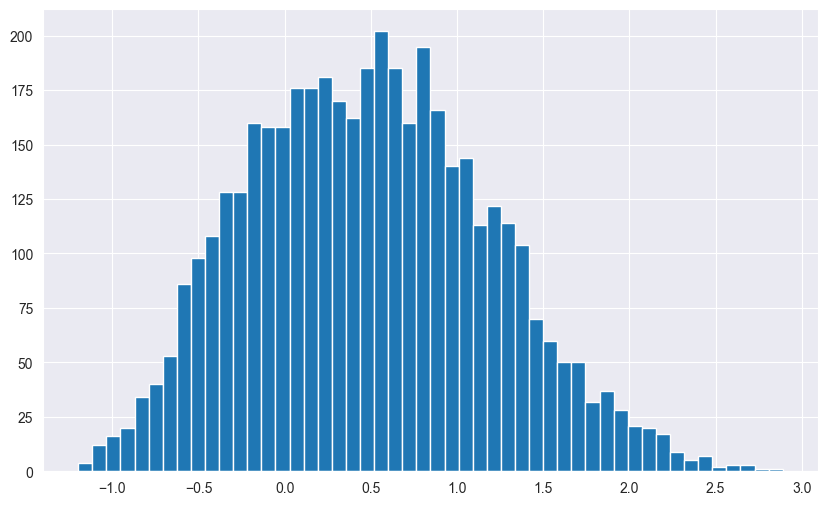

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are large numpy arrays
  # Replace with actual y_pred

# Calculate residuals in a memory-efficient way
residuals = y_test - y_pred_lstm  # Ensure y_test and y_pred are 1D arrays, not 2D

# Plotting in smaller batches to avoid large memory allocations
batch_size = 10000  # Adjust batch size as necessary
for i in range(0, len(residuals), batch_size):
    plt.figure(figsize=(10, 6))
    plt.hist(residuals[i:i + batch_size], bins=50)
    plt.show()

In [19]:
# Mevcut tarih özelliklerini kullanarak yeni özellikler
data['Month'] = data['Date'].dt.month
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Yeni özelliklerle veri setini yeniden ayırma
X = data.drop(['Weekly_Sales_Log_Standardized', 'Date'], axis=1)  # 'Date' sütununu çıkarıyoruz
y = data['Weekly_Sales_Log_Standardized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from tensorflow.keras.layers import Bidirectional

# Bidirectional LSTM Modeli
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Performans değerlendirme
y_pred_bilstm = model.predict(X_test)
print("Bidirectional LSTM Model Performansı:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bilstm))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bilstm))
print("R-squared:", r2_score(y_test, y_pred_bilstm))


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 68s 21ms/step - loss: 0.8226 - val_loss: 0.6992
Epoch 2/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.7044 - val_loss: 0.6641
Epoch 3/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - loss: 0.6631 - val_loss: 0.6006
Epoch 4/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.6082 - val_loss: 0.5564
Epoch 5/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.5756 - val_loss: 0.5414
Epoch 6/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.5538 - val_loss: 0.5194
Epoch 7/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - loss: 0.5353 - val_loss: 0.5080
Epoch 8/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - loss: 0.5245 - val_loss: 0.4897
Epoch 9/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.5049 - val_loss: 0.4806
Epoch 10/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - loss: 0.4996 - val_loss: 0.4727
Epoch 11/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - loss: 0.4887 - val_loss: 0.4527
Epoch 12

Ensemble Model Performansı:
Mean Absolute Error: 0.5841432350875788
Mean Squared Error: 0.5394885672397036
R-squared: 0.4081149262513942


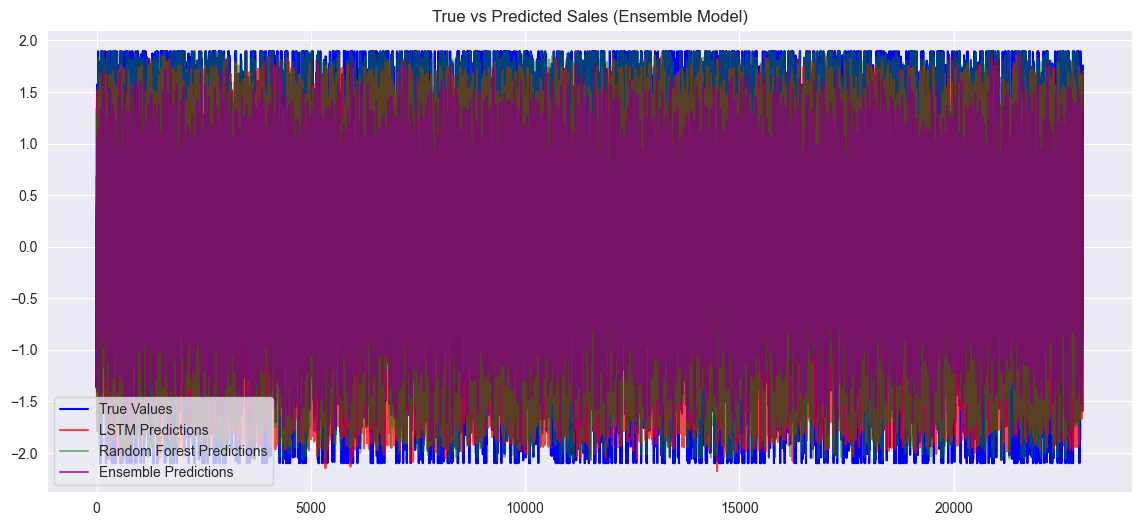

In [23]:
# LSTM tahminleri ve başka bir modelin (örneğin Random Forest) tahminleriyle ensemble
y_pred_rf = rf_model.predict(X_test)  # Mevcut RandomForest modeli
y_pred_lstm_new = y_pred_lstm_new.flatten()

# Tahminlerin uzunluklarını eşitleme
min_len = min(len(y_pred_lstm_new), len(y_pred_rf))
y_pred_lstm_new = y_pred_lstm_new[:min_len]
y_pred_rf = y_pred_rf[:min_len]
y_test_aligned = y_test[:min_len]

# Ensemble (Basit Ortalama) Tahminleri
y_pred_ensemble = (y_pred_lstm_new + y_pred_rf) / 2

# Performans değerlendirme
print("Ensemble Model Performansı:")
print("Mean Absolute Error:", mean_absolute_error(y_test_aligned, y_pred_ensemble))
print("Mean Squared Error:", mean_squared_error(y_test_aligned, y_pred_ensemble))
print("R-squared:", r2_score(y_test_aligned, y_pred_ensemble))

# Sonuçları görselleştirme
plt.figure(figsize=(14, 6))
plt.plot(y_test_aligned.values, label="True Values", color="blue")
plt.plot(y_pred_lstm_new, label="LSTM Predictions", color="red", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest Predictions", color="green", alpha=0.5)
plt.plot(y_pred_ensemble, label="Ensemble Predictions", color="purple", alpha=0.7)
plt.legend()
plt.title("True vs Predicted Sales (Ensemble Model)")
plt.show()


In [43]:
# Gerekli kütüphanelerin ithalatı
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr])

y_pred_bilstm = model.predict(X_test)
print("Bidirectional LSTM Model Performansı:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bilstm))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bilstm))
print("R-squared:", r2_score(y_test, y_pred_bilstm))


Epoch 1/20


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2877/2877 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - loss: 0.8618 - val_loss: 0.7172 - learning_rate: 0.0010
Epoch 2/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.7199 - val_loss: 0.6749 - learning_rate: 0.0010
Epoch 3/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - loss: 0.6654 - val_loss: 0.5997 - learning_rate: 0.0010
Epoch 4/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 51s 18ms/step - loss: 0.6148 - val_loss: 0.5767 - learning_rate: 0.0010
Epoch 5/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 0.5831 - val_loss: 0.5195 - learning_rate: 0.0010
Epoch 6/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 0.5494 - val_loss: 0.5420 - learning_rate: 0.0010
Epoch 7/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 0.5436 - val_loss: 0.5136 - learning_rate: 0.0010
Epoch 8/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 0.5201 - val_loss: 0.4754 - learning_rate: 0.0010
Epoch 9/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 0.4833 - val_loss: 0.4435 - learning_rate

In [48]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model training is completed, now evaluate the performance
y_pred_bilstm = model.predict(X_test).flatten()  # Obtain and flatten predictions

# Use values attribute to convert Series to a NumPy array and then flatten it
y_test_flattened = y_test.values.flatten()

# Print performance metrics
print("Bidirectional LSTM Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_flattened, y_pred_bilstm)}")
print(f"Mean Squared Error: {mean_squared_error(y_test_flattened, y_pred_bilstm)}")
print(f"R2 Score: {r2_score(y_test_flattened, y_pred_bilstm)}")



720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Bidirectional LSTM Model Performance:
Mean Absolute Error: 0.40995315305955554
Mean Squared Error: 0.3300551054099743
R2 Score: 0.6378891004007371


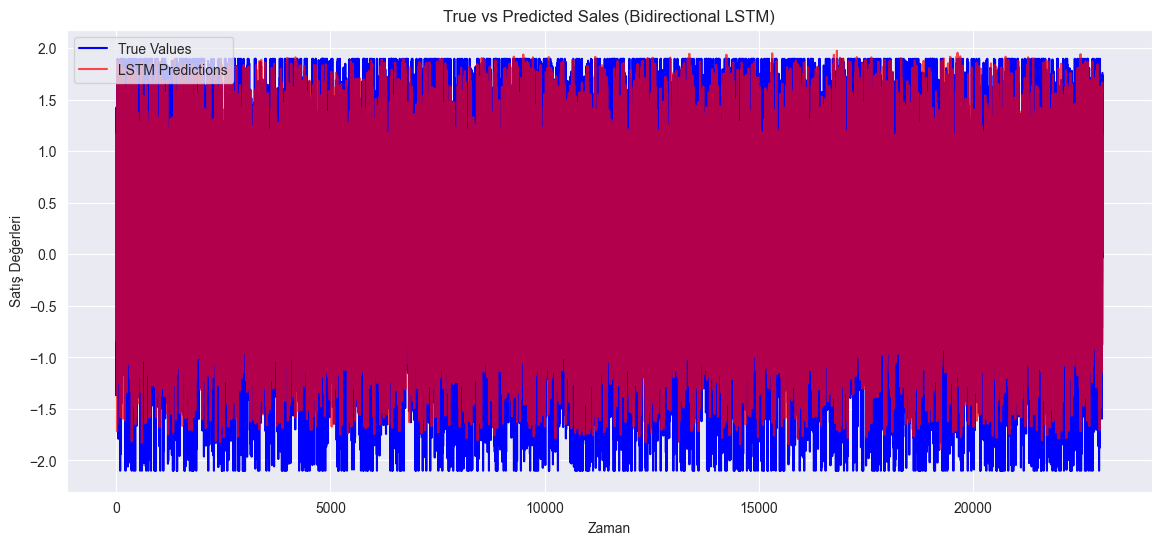

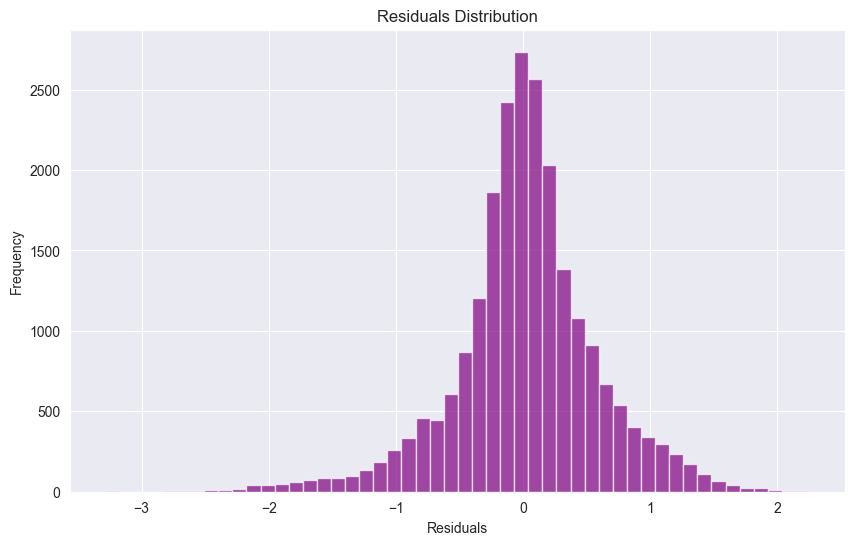

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import joblib

# Function to save the model and scalers
def save_model_and_scalers(model, scaler, model_path, scaler_path):
    model.save(model_path)
    joblib.dump(scaler, scaler_path)

# Function to save datasets and predictions
def save_datasets_and_predictions(dataset_path, prediction_path, X_train, X_test, y_train, y_test, y_pred_bilstm):
    np.savez(dataset_path, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
    np.savez(prediction_path, y_pred_bilstm=y_pred_bilstm)

# Function to plot the true vs predicted values
def plot_true_vs_predicted(y_test_flattened, y_pred_bilstm):
    plt.figure(figsize=(14, 6))
    plt.plot(y_test_flattened, label="True Values", color="blue")
    plt.plot(y_pred_bilstm, label="LSTM Predictions", color="red", alpha=0.7)
    plt.xlabel("Zaman")
    plt.ylabel("Satış Değerleri")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title("True vs Predicted Sales (Bidirectional LSTM)")
    plt.show()


# Function to plot the distribution of residuals
def plot_residuals_distribution(residuals):
    residuals = y_test_flattened - y_pred_bilstm
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=50, color="purple", alpha=0.7)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.title("Residuals Distribution")
    plt.show()

# File paths
model_path = "C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Models/bilstm_model.keras"
scaler_path = "C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Models/scaler.pkl"
dataset_path = "C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/dataset_splits.npz"
prediction_path = "C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/predictions.npz"

# Save the model and scaler
save_model_and_scalers(model, scaler, model_path, scaler_path)

# Save the datasets and predictions
save_datasets_and_predictions(dataset_path, prediction_path, X_train, X_test, y_train, y_test, y_pred_bilstm)

# Plot true vs predicted values
plot_true_vs_predicted(y_test_flattened, y_pred_bilstm)

# Calculate residuals and plot their distribution
residuals = y_test_flattened - y_pred_bilstm
plot_residuals_distribution(residuals)

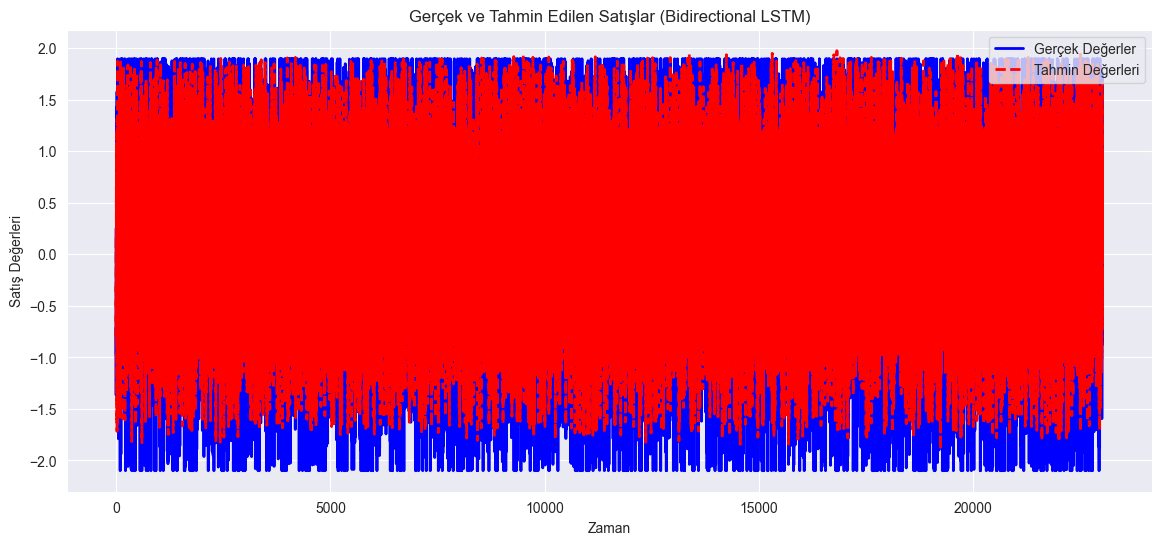

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test_flattened, label="Gerçek Değerler", color="blue", linestyle='-', linewidth=2)
plt.plot(y_pred_bilstm, label="Tahmin Değerleri", color="red", linestyle='--', linewidth=2)
plt.xlabel("Zaman")
plt.ylabel("Satış Değerleri")
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Gerçek ve Tahmin Edilen Satışlar (Bidirectional LSTM)")
plt.show()


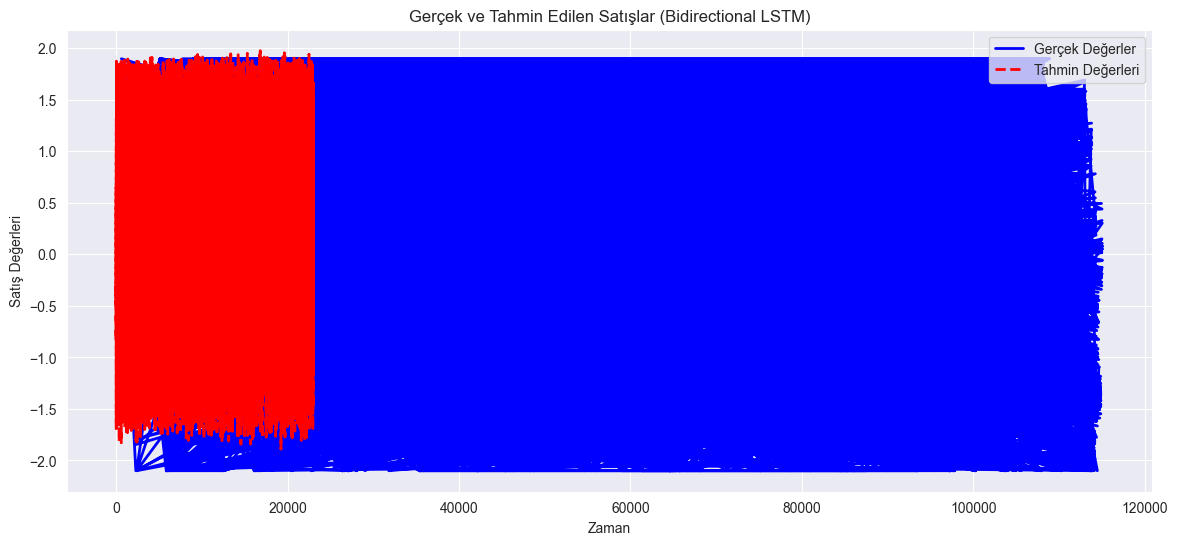

Mean Absolute Error: 0.40995315305955554
Mean Squared Error: 0.3300551054099743
R-squared: 0.6378891004007371


In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming y_test and y_pred_bilstm are already defined and are 1D arrays
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Gerçek Değerler", color="blue", linestyle='-', linewidth=2)
plt.plot(y_pred_bilstm, label="Tahmin Değerleri", color="red", linestyle='--', linewidth=2)
plt.xlabel("Zaman")
plt.ylabel("Satış Değerleri")
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Gerçek ve Tahmin Edilen Satışlar (Bidirectional LSTM)")
plt.show()

# Print performance metrics for additional clarity
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_bilstm)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_bilstm)}")
print(f"R-squared: {r2_score(y_test, y_pred_bilstm)}")

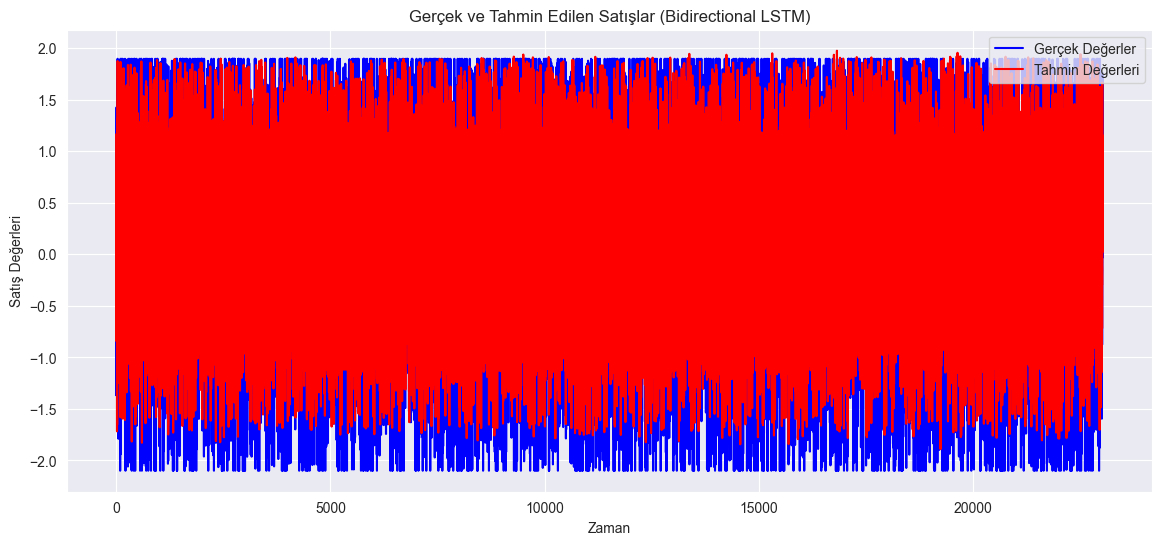

In [56]:
plt.figure(figsize=(14, 6))

# Gerçek değerleri mavi düz çizgi ile çizme
plt.plot(y_test_flattened, label="Gerçek Değerler", color="blue", linestyle='-')

# Tahmin edilen değerleri kırmızı düz çizgi ile çizme
plt.plot(y_pred_bilstm, label="Tahmin Değerleri", color="red", linestyle='-')

plt.xlabel("Zaman")
plt.ylabel("Satış Değerleri")
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Gerçek ve Tahmin Edilen Satışlar (Bidirectional LSTM)")
plt.show()


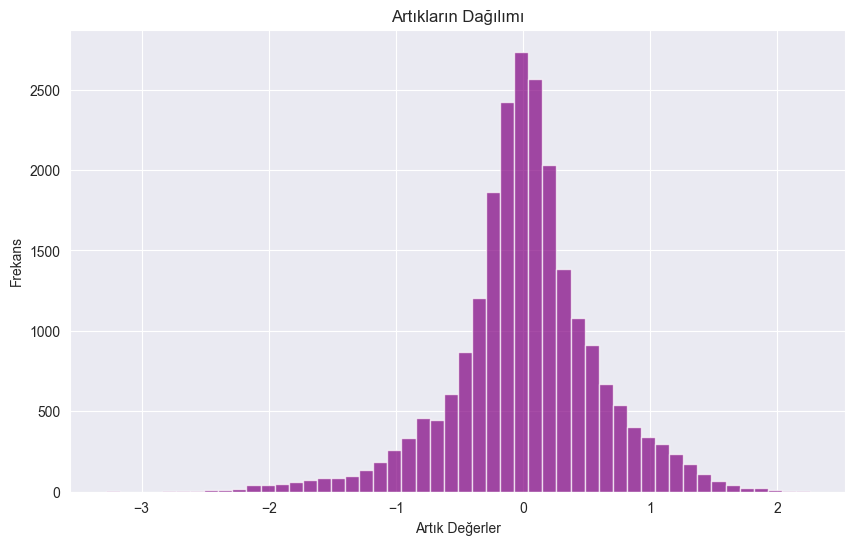

In [57]:
residuals = y_test_flattened - y_pred_bilstm

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color="purple", alpha=0.7)
plt.xlabel("Artık Değerler")
plt.ylabel("Frekans")
plt.title("Artıkların Dağılımı")
plt.grid(True)
plt.show()


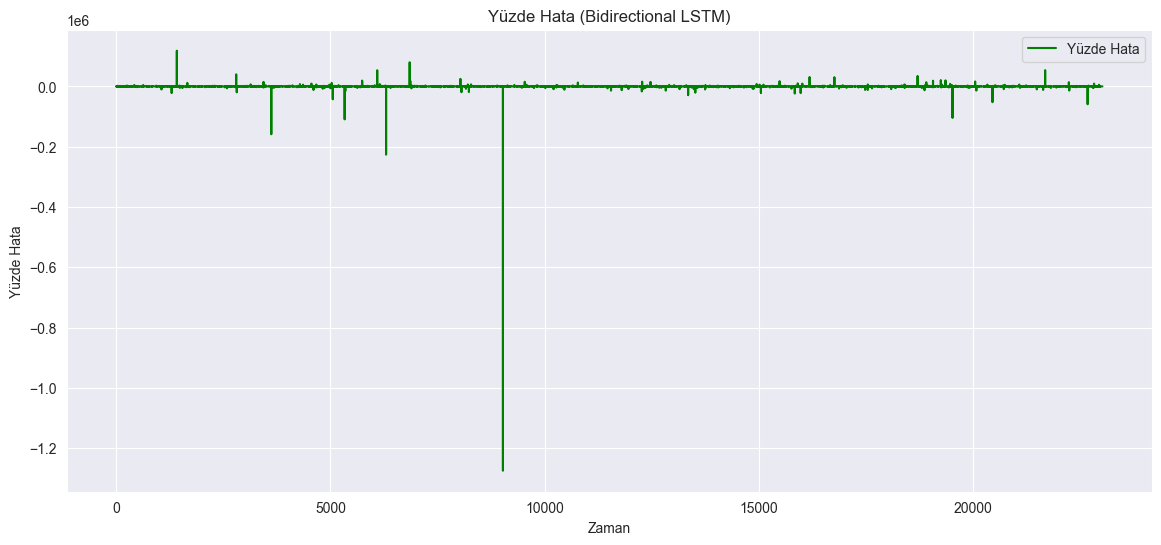

In [58]:
percentage_errors = 100 * residuals / y_test_flattened

plt.figure(figsize=(14, 6))
plt.plot(percentage_errors, label="Yüzde Hata", color="green", linestyle='-')
plt.xlabel("Zaman")
plt.ylabel("Yüzde Hata")
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Yüzde Hata (Bidirectional LSTM)")
plt.show()


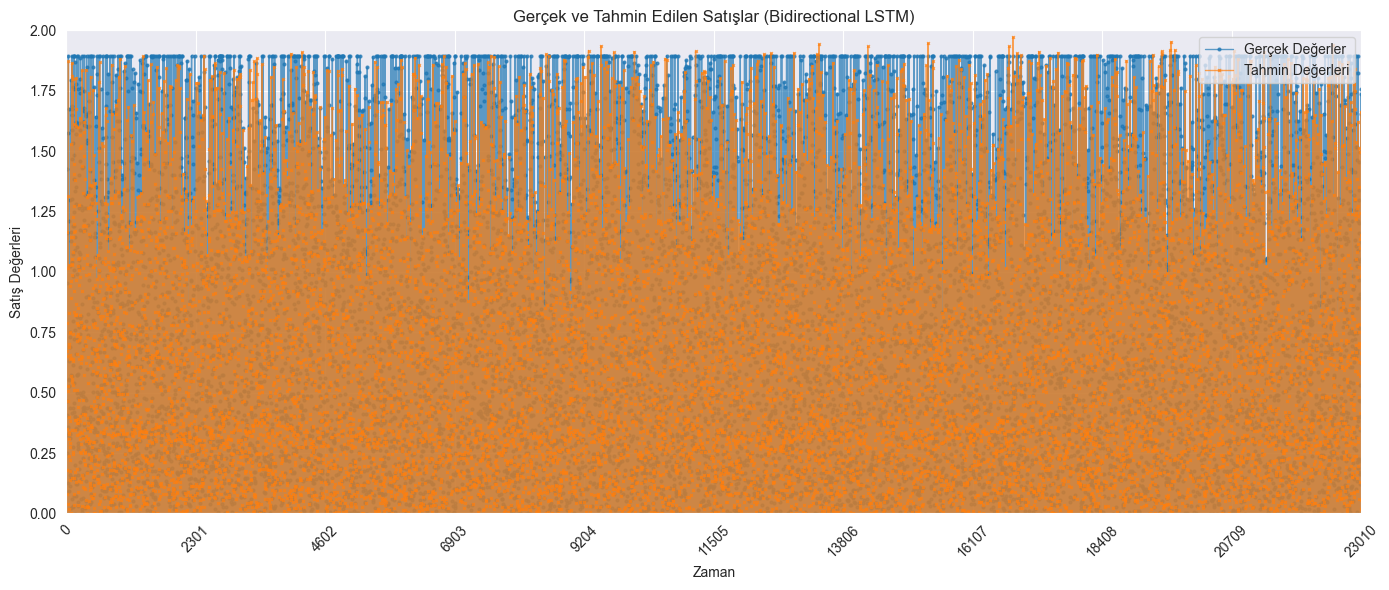

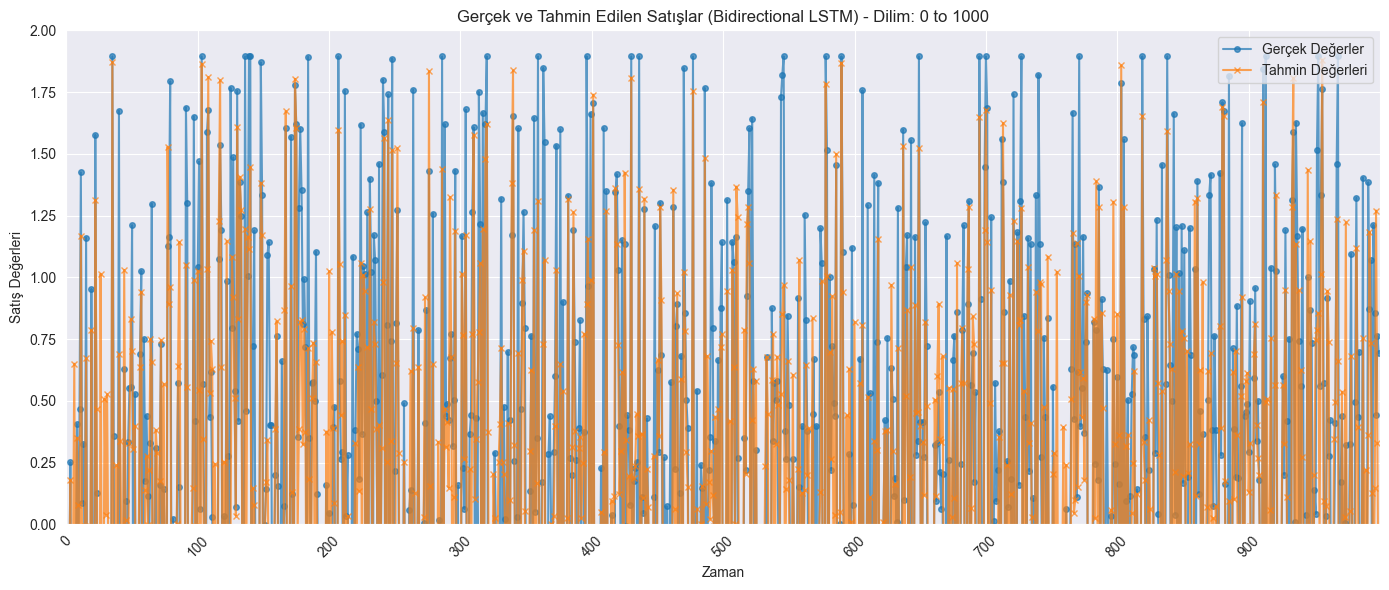

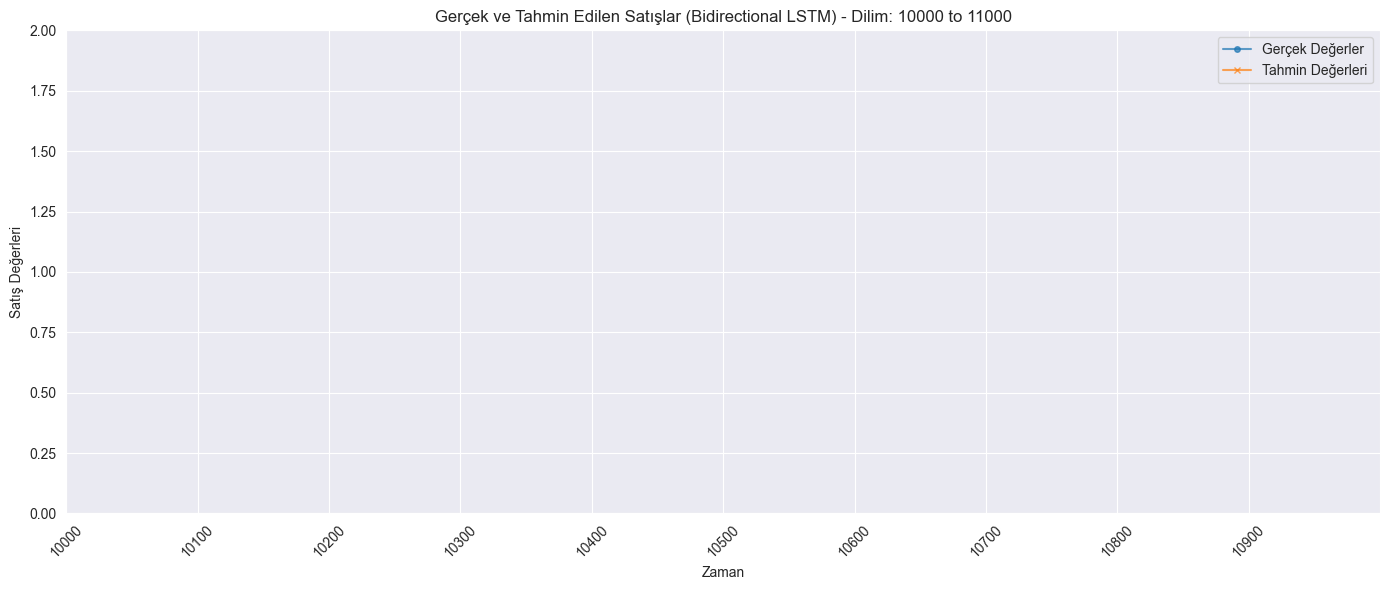

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import joblib


# Model ve scaler'ı kaydetme fonksiyonu
def save_model_and_scalers(model, scaler, model_path, scaler_path):
    model.save(model_path)
    joblib.dump(scaler, scaler_path)


# Dataset ve tahminleri kaydetme fonksiyonu
def save_datasets_and_predictions(dataset_path, prediction_path, X_train, X_test, y_train, y_test, y_pred_bilstm):
    np.savez(dataset_path, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
    np.savez(prediction_path, y_pred_bilstm=y_pred_bilstm)


# Gerçek ve tahmin edilen değerlerin tam zaman diliminde görselleştirilmesi
def plot_true_vs_predicted(y_test_flattened, y_pred_bilstm):
    plt.figure(figsize=(14, 6))

    # Gerçek değerleri mavi düz çizgi ile çizme
    plt.plot(y_test_flattened, label="Gerçek Değerler", color="#1f77b4", marker='o', linestyle='-', markersize=2,
             linewidth=1, alpha=0.7)

    # Tahmin edilen değerleri kırmızı düz çizgi ile çizme
    plt.plot(y_pred_bilstm, label="Tahmin Değerleri", color="#ff7f0e", marker='x', linestyle='-', markersize=2,
             linewidth=1, alpha=0.7)

    plt.xlabel("Zaman")
    plt.ylabel("Satış Değerleri")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.title("Gerçek ve Tahmin Edilen Satışlar (Bidirectional LSTM)")

    # X ve Y eksenlerinin kapsamını ayarlama
    plt.xlim(0, len(y_test_flattened))
    plt.ylim(0, 2)

    # X ekseni etiketlerini ayarlama
    plt.xticks(ticks=np.arange(0, len(y_test_flattened), step=max(len(y_test_flattened) // 10, 1)), rotation=45)

    plt.tight_layout()  # Tüm öğelerin net görünmesini sağlama
    plt.show()


# Belirli bir dilimi görselleştirme
def plot_true_vs_predicted_subset(y_test_flattened, y_pred_bilstm, start=0, end=1000):
    plt.figure(figsize=(14, 6))

    # Gerçek değerleri mavi düz çizgi ile çizme
    plt.plot(y_test_flattened[start:end], label="Gerçek Değerler", color="#1f77b4", marker='o', linestyle='-',
             markersize=4, linewidth=1.5, alpha=0.7)

    # Tahmin edilen değerleri kırmızı düz çizgi ile çizme
    plt.plot(y_pred_bilstm[start:end], label="Tahmin Değerleri", color="#ff7f0e", marker='x', linestyle='-',
             markersize=4, linewidth=1.5, alpha=0.7)

    plt.xlabel("Zaman")
    plt.ylabel("Satış Değerleri")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.title(f"Gerçek ve Tahmin Edilen Satışlar (Bidirectional LSTM) - Dilim: {start} to {end}")

    # X ve Y eksenlerinin kapsamını ayarlama
    plt.xlim(start, end)
    plt.ylim(0, 2)

    # X ekseni etiketlerini ayarlama
    plt.xticks(ticks=np.arange(start, end, step=max((end - start) // 10, 1)), rotation=45)

    plt.tight_layout()  # Tüm öğelerin net görünmesini sağlama
    plt.show()


# Dosya yolları
model_path = "C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Models/bilstm_model.keras"
scaler_path = "C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Models/scaler.pkl"
dataset_path = "C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/dataset_splits.npz"
prediction_path = "C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/predictions.npz"

# Model ve scaler'ı kaydet
save_model_and_scalers(model, scaler, model_path, scaler_path)

# Dataset ve tahminleri kaydet
save_datasets_and_predictions(dataset_path, prediction_path, X_train, X_test, y_train, y_test, y_pred_bilstm)

# Görselleştirme
plot_true_vs_predicted(y_test_flattened, y_pred_bilstm)

# Örnek küçük diliminin görselleştirilmesi
plot_true_vs_predicted_subset(y_test_flattened, y_pred_bilstm, start=0, end=1000)
plot_true_vs_predicted_subset(y_test_flattened, y_pred_bilstm, start=10000, end=11000)


In [62]:
def print_data_summary(y_test_flattened, y_pred_bilstm):
    print(f"y_test_flattened first 10 values:\n{y_test_flattened[:10]}")
    print(f"y_pred_bilstm first 10 values:\n{y_pred_bilstm[:10]}")
    print(f"y_test_flattened min value: {np.min(y_test_flattened)}, max value: {np.max(y_test_flattened)}")
    print(f"y_pred_bilstm min value: {np.min(y_pred_bilstm)}, max value: {np.max(y_pred_bilstm)}")


print_data_summary(y_test_flattened, y_pred_bilstm)


y_test_flattened first 10 values:
[-0.71095219 -1.36773142 -0.45733389  0.25174384 -0.7251487  -0.98299728
 -0.24427047 -0.40505008  0.40632962 -0.28416712]
y_pred_bilstm first 10 values:
[-0.30524537 -0.8365739  -0.3155848   0.18123436 -0.7705433  -0.1906876
  0.6505297  -0.7323125   0.35008028  0.07894021]
y_test_flattened min value: -2.099471640769116, max value: 1.8948303374735465
y_pred_bilstm min value: -1.890426754951477, max value: 1.972994089126587


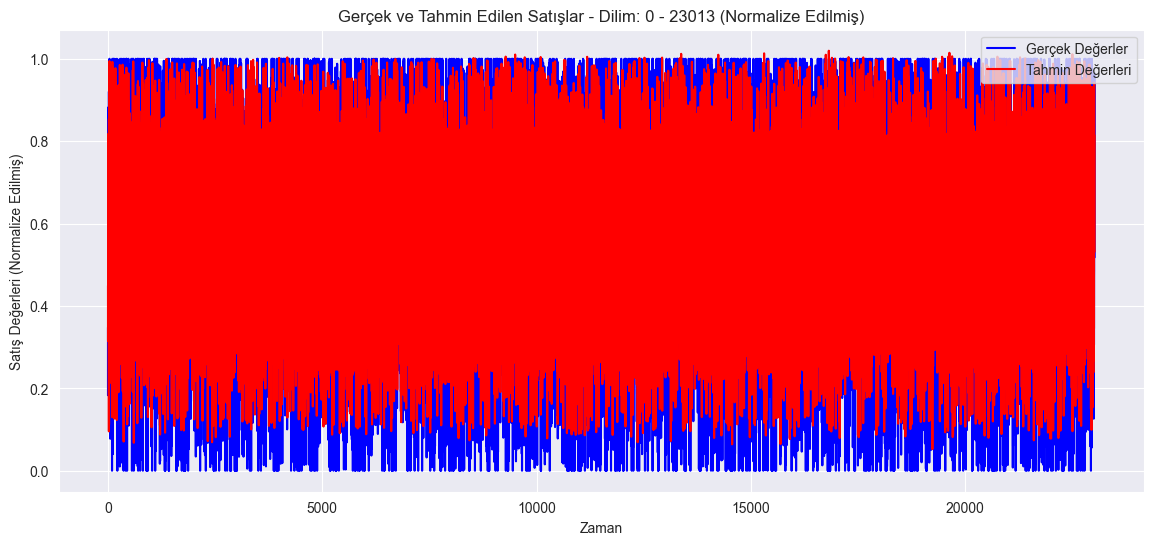

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Normalizasyon
def normalize_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_data = scaler.fit_transform(data.reshape(-1, 1))
    return normalized_data.flatten(), scaler


# Verilerin normalize edilmesi
y_test_flattened_normalized, scaler_test = normalize_data(y_test_flattened)
y_pred_bilstm_normalized = scaler_test.transform(y_pred_bilstm.reshape(-1, 1)).flatten()


def plot_normalized_line_chart(y_test_flattened, y_pred_bilstm, start=0, end=None):
    if end is None:
        end = len(y_test_flattened)

    plt.figure(figsize=(14, 6))

    # Gerçek değerleri mavi düz çizgi ile çizme
    plt.plot(y_test_flattened[start:end], label="Gerçek Değerler", color='blue', linestyle='-')

    # Tahmin edilen değerleri kırmızı düz çizgi ile çizme
    plt.plot(y_pred_bilstm[start:end], label="Tahmin Değerleri", color='red', linestyle='-')

    plt.xlabel("Zaman")
    plt.ylabel("Satış Değerleri (Normalize Edilmiş)")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.title(f"Gerçek ve Tahmin Edilen Satışlar - Dilim: {start} - {end} (Normalize Edilmiş)")

    plt.show()


# Normalleştirilmiş çizgi grafiği
plot_normalized_line_chart(y_test_flattened_normalized, y_pred_bilstm_normalized)


In [65]:
print(f"y_test_flattened shape: {y_test_flattened.shape}")
print(f"y_pred_bilstm shape: {y_pred_bilstm.shape}")


y_test_flattened shape: (23013,)
y_pred_bilstm shape: (23013,)


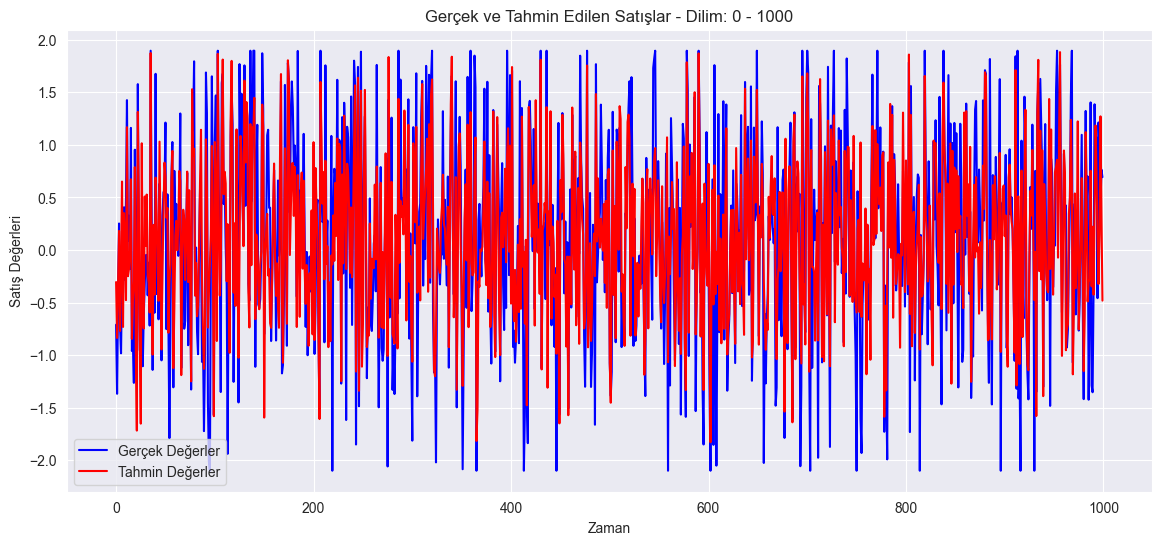

In [66]:
import matplotlib.pyplot as plt


def plot_basic_line_chart(y_test_flattened, y_pred_bilstm, start=0, end=1000):
    plt.figure(figsize=(14, 6))

    # Sadece başlangıçtan end noktasına kadar olan verileri çizme
    end = min(end, len(y_test_flattened), len(y_pred_bilstm))

    # Gerçek değerleri mavi çizgiyle çizme
    plt.plot(y_test_flattened[start:end], label="Gerçek Değerler", color='blue')

    # Tahmin edilen değerleri kırmızı çizgiyle çizme
    plt.plot(y_pred_bilstm[start:end], label="Tahmin Değerler", color='red')

    plt.xlabel("Zaman")
    plt.ylabel("Satış Değerleri")
    plt.title(f"Gerçek ve Tahmin Edilen Satışlar - Dilim: {start} - {end}")
    plt.legend()
    plt.grid(True)
    plt.show()


# Grafik çizimi
plot_basic_line_chart(y_test_flattened, y_pred_bilstm)


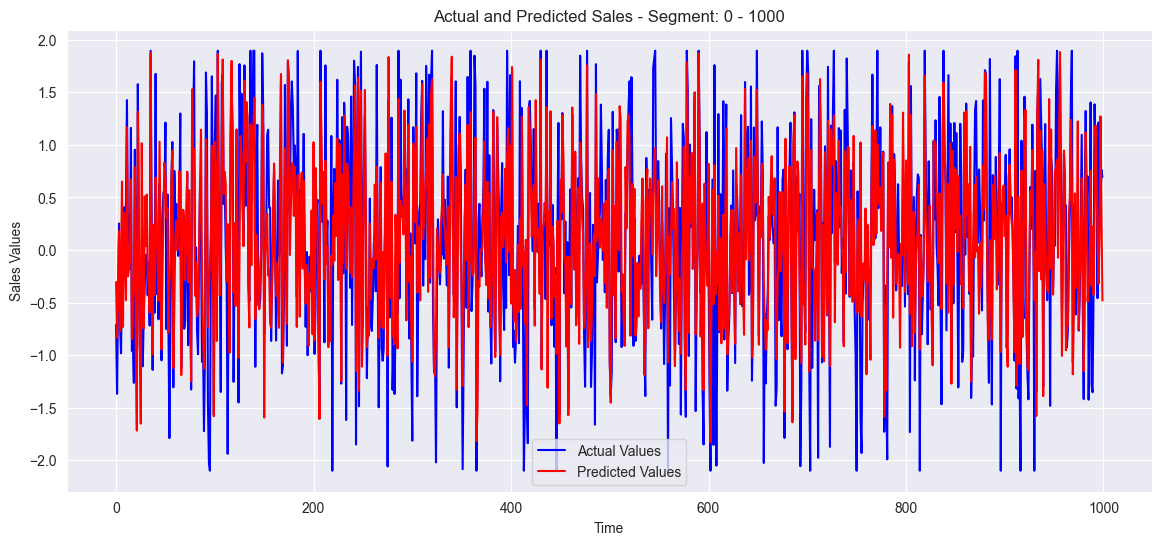

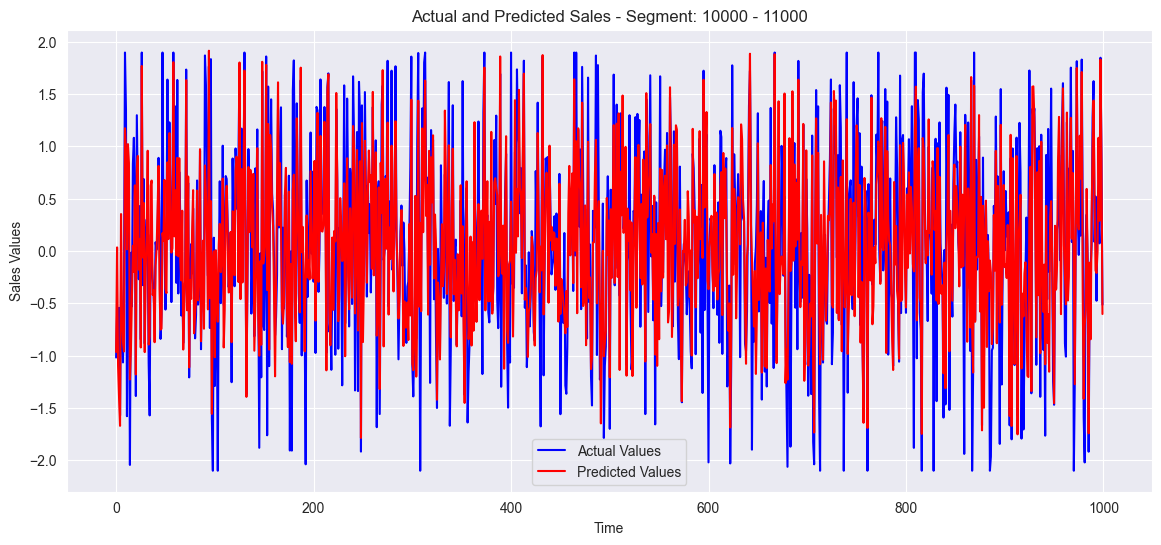

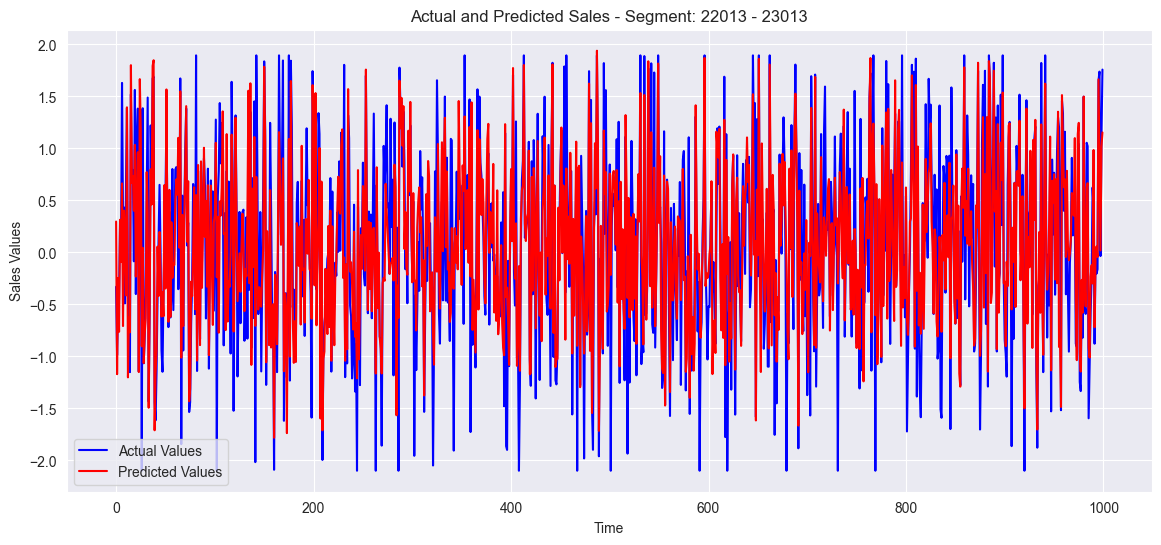

In [68]:
import matplotlib.pyplot as plt

def plot_simple_chart_section(y_test_flattened, y_pred_bilstm, start=0, end=1000):
    plt.figure(figsize=(14, 6))

    end = min(end, len(y_test_flattened), len(y_pred_bilstm))

    plt.plot(y_test_flattened[start:end], label="Actual Values", color='blue')

    plt.plot(y_pred_bilstm[start:end], label="Predicted Values", color='red')

    plt.xlabel("Time")
    plt.ylabel("Sales Values")
    plt.title(f"Actual and Predicted Sales - Segment: {start} - {end}")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_simple_chart_section(y_test_flattened, y_pred_bilstm, start=0, end=1000)
plot_simple_chart_section(y_test_flattened, y_pred_bilstm, start=10000, end=11000)
plot_simple_chart_section(y_test_flattened, y_pred_bilstm, start=22013, end=23013)
